In [1]:
# info here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# http://www.smartcomputerlab.org/m6/Lab1.regression.tf.keras.pdf

## Imports

In [2]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning.
import keras as kr
import tensorflow as tf

import numpy as np

## Class: Linear Regression

In [3]:
class LinearRegression:
    
    # Constructor, defining # of epochs here.
    def __init__(self, epoch):
        print(f'Linear Regression model to be created with {epoch} epochs.')
        self.epoch = epoch

    # Loads the data from the file, seperates into X and y.
    def LoadData(self, fname):  
        # Limiting to .3 decimal points.
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        # Reading fname, skipping headings
        self.dataset = np.loadtxt(fname, delimiter=",", skiprows=1)
        # Windspeed data.
        self.X = self.dataset[:,0]
        # Power data.
        self.y = self.dataset[:,1]
        
    # Creates the model.
    def CreateModel(self):
        # Create model.
        from keras.models import Sequential
        from keras.layers import Dense

        thisShape = 1

        self.model = Sequential()
        self.model.add(Dense(12, input_dim=thisShape, activation='relu'))
        self.model.add(Dense(8, activation='relu'))
        self.model.add(Dense(thisShape, activation='relu'))

        # Train model.
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.tf_history = self.model.fit(self.X, self.y, epochs=self.epoch, verbose=True)
        
        # Prediction.
        self.predictions = self.model.predict(self.X)
        
    def PredictPower(self, windspeed):
        speed = [windspeed]
        prediction = self.model.predict(speed)
        print("Power prediction: %.3f" % prediction)
        return prediction
        
    # Displays the model loss.
    def DisplayLoss(self):
        # displayLoss():
        plt.title("Linear Regression")
        plt.plot(self.tf_history.history['loss'], color="red")
        plt.xlabel('Epochs')
        plt.ylabel('loss')
        plt.show()
        
    # Displays the model predictions.
    def DisplayPrediction(self):
        # displayPlot():
        plt.figure(figsize=(12,7))
        plt.title('Results')
        plt.scatter(self.X, self.y, label='Data $(X, y)$')
        plt.plot(self.X, self.predictions, color='red', label='Linear Regression',linewidth=3.0)
        plt.xlabel('$X$', fontsize=20)
        plt.ylabel('$y$', fontsize=20)
        plt.grid(True)
        plt.legend(fontsize=20)
        plt.show()
    

## Class: Polynomial Regression

In [4]:
class PolynomialRegression:
    
    # Constructor, defining # of epochs and poly features here.
    def __init__(self, epoch, polyDegree):
        print(f'Polynomial Regression model to be created with {polyDegree} Polynominal features, {epoch} epochs.')
        # PolynomialFeatures.
        self.polyDegree = polyDegree
        self.epoch = epoch

    # Loads the data from the file, seperates into X and y. Allows for polynomial features.
    def LoadData(self, fname):  
        # Limiting to .3 decimal points.
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        # Reading fname, skipping headings
        self.dataset = np.loadtxt(fname, delimiter=",", skiprows=1)
        # Windspeed data.
        self.X = self.dataset[:,0]
        # Power data.
        self.y = self.dataset[:,1]
        
        from sklearn.preprocessing import PolynomialFeatures
        self.poly = PolynomialFeatures(degree=self.polyDegree)
        self.X_2 = self.poly.fit_transform(self.X.reshape(-1,1))
        
    # Creates the model.
    def CreateModel(self):
        # Create model.
        from keras.models import Sequential
        from keras.layers import Dense

        thisShape = 1+self.polyDegree

        self.model = Sequential()
        self.model.add(Dense(64, input_dim=thisShape, activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(thisShape, activation='relu'))

        # Train model.
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.pr_history = self.model.fit(self.X_2, self.y, epochs=self.epoch, verbose=True)
                
        # Prediction.
        self.predictions = self.model.predict(self.X_2)
        
    # Makes a prediction based on the model.
    def PredictPower(self, windspeed):
        value = np.array([windspeed])
        aValue = self.poly.fit_transform(value.reshape(-1,1))
        prediction = self.model.predict(aValue)
        print("Power prediction: %.3f" % prediction[0][1])
        return prediction[0][1]
        
    # Displays the model loss.
    def DisplayLoss(self):
        plt.title("Polynomial Regression")
        plt.plot(self.pr_history.history['loss'], color="red")
        plt.xlabel('Epochs')
        plt.ylabel('loss')
        plt.show()
        
    # Displays the model predictions.
    def DisplayPrediction(self):
        plt.figure(figsize=(12,7))
        plt.title('Results')
        plt.scatter(self.X_2[:,1], self.y, label='Data $(X, y)$')
        plt.plot(self.X_2[:,1], self.predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
        plt.xlabel('$X$', fontsize=20)
        plt.ylabel('$y$', fontsize=20)
        plt.grid(True)
        plt.legend(fontsize=20)
        plt.show()
    

## Testing
Testing the LinearRegression and PolynomialRegression models.

In [5]:
class TestClass:
    fname = "Windspeed.txt"
  
    
    def CreateLinearRegression(self):
        self.lr = LinearRegression(2000)
        self.lr.LoadData(self.fname)

    def CreatePolynomialRegression(self):
        self.pr = PolynomialRegression(2000, 3)
        self.pr.LoadData(self.fname)   
        
    def TrainLR(self):
        self.lr.CreateModel()
    
    def TrainPR(self):
        self.pr.CreateModel()
        
    def DisplayLoss(self):
        self.lr.DisplayLoss()
        self.pr.DisplayLoss()
        
    def Predictions(self):
        self.lr.PredictPower(20)
        self.pr.PredictPower(20)

    def DisplayPredictions(self):
        self.lr.DisplayPrediction()
        self.pr.DisplayPrediction()
        

In [6]:
test = TestClass()
test.CreateLinearRegression()
test.CreatePolynomialRegression()

Linear Regression model to be created with 2000 epochs.
Polynomial Regression model to be created with 3 Polynominal features, 2000 epochs.


In [7]:
test.TrainLR()

Epoch 1/2000
16/16 [==============================] - 0s 689us/step - loss: 3558.8767
Epoch 2/2000
16/16 [==============================] - 0s 749us/step - loss: 3225.0833
Epoch 3/2000
16/16 [==============================] - 0s 750us/step - loss: 2898.1187
Epoch 4/2000
16/16 [==============================] - 0s 998us/step - loss: 2580.6575
Epoch 5/2000
16/16 [==============================] - 0s 1000us/step - loss: 2264.2664
Epoch 6/2000
16/16 [==============================] - 0s 1000us/step - loss: 1965.1198
Epoch 7/2000
16/16 [==============================] - 0s 813us/step - loss: 1674.7812
Epoch 8/2000
16/16 [==============================] - 0s 750us/step - loss: 1406.2883
Epoch 9/2000
16/16 [==============================] - 0s 813us/step - loss: 1167.7841
Epoch 10/2000
16/16 [==============================] - 0s 812us/step - loss: 982.6887
Epoch 11/2000
16/16 [==============================] - 0s 875us/step - loss: 837.8345
Epoch 12/2000
16/16 [==============================]

16/16 [==============================] - 0s 563us/step - loss: 492.8768
Epoch 97/2000
16/16 [==============================] - 0s 750us/step - loss: 492.2539
Epoch 98/2000
16/16 [==============================] - 0s 688us/step - loss: 491.6733
Epoch 99/2000
16/16 [==============================] - 0s 500us/step - loss: 491.3214
Epoch 100/2000
16/16 [==============================] - 0s 562us/step - loss: 491.2097
Epoch 101/2000
16/16 [==============================] - 0s 687us/step - loss: 490.5174
Epoch 102/2000
16/16 [==============================] - 0s 625us/step - loss: 490.3357
Epoch 103/2000
16/16 [==============================] - 0s 562us/step - loss: 491.1409
Epoch 104/2000
16/16 [==============================] - 0s 625us/step - loss: 490.5526
Epoch 105/2000
16/16 [==============================] - 0s 625us/step - loss: 489.3313
Epoch 106/2000
16/16 [==============================] - 0s 500us/step - loss: 488.2255
Epoch 107/2000
16/16 [==============================] - 0s 68

16/16 [==============================] - 0s 500us/step - loss: 460.1677
Epoch 191/2000
16/16 [==============================] - 0s 687us/step - loss: 459.7952
Epoch 192/2000
16/16 [==============================] - 0s 687us/step - loss: 459.4465
Epoch 193/2000
16/16 [==============================] - 0s 500us/step - loss: 459.3466
Epoch 194/2000
16/16 [==============================] - 0s 562us/step - loss: 459.1547
Epoch 195/2000
16/16 [==============================] - 0s 687us/step - loss: 458.9923
Epoch 196/2000
16/16 [==============================] - 0s 625us/step - loss: 458.6063
Epoch 197/2000
16/16 [==============================] - 0s 500us/step - loss: 459.2508
Epoch 198/2000
16/16 [==============================] - 0s 687us/step - loss: 458.4957
Epoch 199/2000
16/16 [==============================] - 0s 688us/step - loss: 458.5987
Epoch 200/2000
16/16 [==============================] - 0s 562us/step - loss: 457.4871
Epoch 201/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 688us/step - loss: 446.7724
Epoch 284/2000
16/16 [==============================] - 0s 500us/step - loss: 447.6786
Epoch 285/2000
16/16 [==============================] - 0s 562us/step - loss: 446.1874
Epoch 286/2000
16/16 [==============================] - 0s 625us/step - loss: 446.9793
Epoch 287/2000
16/16 [==============================] - 0s 625us/step - loss: 446.1800
Epoch 288/2000
16/16 [==============================] - 0s 562us/step - loss: 447.2491
Epoch 289/2000
16/16 [==============================] - 0s 562us/step - loss: 446.0184
Epoch 290/2000
16/16 [==============================] - 0s 938us/step - loss: 446.3747
Epoch 291/2000
16/16 [==============================] - 0s 750us/step - loss: 447.5434
Epoch 292/2000
16/16 [==============================] - 0s 625us/step - loss: 446.1229
Epoch 293/2000
16/16 [==============================] - 0s 500us/step - loss: 445.6012
Epoch 294/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 625us/step - loss: 438.4269
Epoch 378/2000
16/16 [==============================] - 0s 688us/step - loss: 438.8925
Epoch 379/2000
16/16 [==============================] - 0s 688us/step - loss: 438.9252
Epoch 380/2000
16/16 [==============================] - 0s 500us/step - loss: 437.9312
Epoch 381/2000
16/16 [==============================] - 0s 562us/step - loss: 438.8590
Epoch 382/2000
16/16 [==============================] - 0s 687us/step - loss: 439.1516
Epoch 383/2000
16/16 [==============================] - 0s 688us/step - loss: 437.6102
Epoch 384/2000
16/16 [==============================] - 0s 500us/step - loss: 437.6664
Epoch 385/2000
16/16 [==============================] - 0s 750us/step - loss: 437.5026
Epoch 386/2000
16/16 [==============================] - 0s 688us/step - loss: 437.2750
Epoch 387/2000
16/16 [==============================] - 0s 625us/step - loss: 437.6188
Epoch 388/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 687us/step - loss: 424.0193
Epoch 472/2000
16/16 [==============================] - 0s 875us/step - loss: 424.2490
Epoch 473/2000
16/16 [==============================] - 0s 687us/step - loss: 423.9124
Epoch 474/2000
16/16 [==============================] - 0s 688us/step - loss: 423.9409
Epoch 475/2000
16/16 [==============================] - 0s 562us/step - loss: 422.3397
Epoch 476/2000
16/16 [==============================] - 0s 625us/step - loss: 422.0663
Epoch 477/2000
16/16 [==============================] - 0s 688us/step - loss: 422.4739
Epoch 478/2000
16/16 [==============================] - 0s 688us/step - loss: 422.8515
Epoch 479/2000
16/16 [==============================] - 0s 562us/step - loss: 423.3177
Epoch 480/2000
16/16 [==============================] - 0s 624us/step - loss: 423.0976
Epoch 481/2000
16/16 [==============================] - 0s 812us/step - loss: 420.7036
Epoch 482/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 687us/step - loss: 395.4073
Epoch 566/2000
16/16 [==============================] - 0s 625us/step - loss: 393.4305
Epoch 567/2000
16/16 [==============================] - 0s 500us/step - loss: 393.1650
Epoch 568/2000
16/16 [==============================] - 0s 688us/step - loss: 391.9188
Epoch 569/2000
16/16 [==============================] - 0s 625us/step - loss: 391.8581
Epoch 570/2000
16/16 [==============================] - ETA: 0s - loss: 840.944 - 0s 625us/step - loss: 390.7458
Epoch 571/2000
16/16 [==============================] - 0s 625us/step - loss: 394.3862
Epoch 572/2000
16/16 [==============================] - 0s 625us/step - loss: 391.4653
Epoch 573/2000
16/16 [==============================] - 0s 625us/step - loss: 390.6212
Epoch 574/2000
16/16 [==============================] - 0s 687us/step - loss: 390.7112
Epoch 575/2000
16/16 [==============================] - 0s 562us/step - loss: 390.4071
Epoch 576/2000
16/16 [==========

16/16 [==============================] - 0s 687us/step - loss: 349.9301
Epoch 660/2000
16/16 [==============================] - 0s 625us/step - loss: 349.2839
Epoch 661/2000
16/16 [==============================] - 0s 500us/step - loss: 352.0463
Epoch 662/2000
16/16 [==============================] - 0s 562us/step - loss: 348.8632
Epoch 663/2000
16/16 [==============================] - 0s 625us/step - loss: 348.1149
Epoch 664/2000
16/16 [==============================] - 0s 500us/step - loss: 351.3418
Epoch 665/2000
16/16 [==============================] - 0s 625us/step - loss: 348.2014
Epoch 666/2000
16/16 [==============================] - 0s 625us/step - loss: 347.6080
Epoch 667/2000
16/16 [==============================] - 0s 500us/step - loss: 346.8872
Epoch 668/2000
16/16 [==============================] - 0s 625us/step - loss: 346.6280
Epoch 669/2000
16/16 [==============================] - 0s 563us/step - loss: 345.0521
Epoch 670/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 750us/step - loss: 318.2677
Epoch 754/2000
16/16 [==============================] - 0s 563us/step - loss: 311.0899
Epoch 755/2000
16/16 [==============================] - 0s 500us/step - loss: 310.1147
Epoch 756/2000
16/16 [==============================] - 0s 625us/step - loss: 308.6004
Epoch 757/2000
16/16 [==============================] - 0s 688us/step - loss: 307.2216
Epoch 758/2000
16/16 [==============================] - 0s 562us/step - loss: 309.4775
Epoch 759/2000
16/16 [==============================] - 0s 625us/step - loss: 307.7591
Epoch 760/2000
16/16 [==============================] - 0s 812us/step - loss: 306.9832
Epoch 761/2000
16/16 [==============================] - 0s 750us/step - loss: 307.0521
Epoch 762/2000
16/16 [==============================] - 0s 750us/step - loss: 308.8129
Epoch 763/2000
16/16 [==============================] - 0s 625us/step - loss: 306.7754
Epoch 764/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 688us/step - loss: 283.8255
Epoch 848/2000
16/16 [==============================] - 0s 688us/step - loss: 278.9460
Epoch 849/2000
16/16 [==============================] - 0s 500us/step - loss: 278.2974
Epoch 850/2000
16/16 [==============================] - 0s 562us/step - loss: 278.1008
Epoch 851/2000
16/16 [==============================] - 0s 812us/step - loss: 279.1800
Epoch 852/2000
16/16 [==============================] - 0s 688us/step - loss: 277.4156
Epoch 853/2000
16/16 [==============================] - 0s 562us/step - loss: 278.2123
Epoch 854/2000
16/16 [==============================] - 0s 624us/step - loss: 278.1364
Epoch 855/2000
16/16 [==============================] - 0s 687us/step - loss: 281.9916
Epoch 856/2000
16/16 [==============================] - 0s 625us/step - loss: 276.3265
Epoch 857/2000
16/16 [==============================] - 0s 500us/step - loss: 281.0160
Epoch 858/2000
16/16 [==============================] - 0s

Epoch 941/2000
16/16 [==============================] - 0s 875us/step - loss: 260.8739
Epoch 942/2000
16/16 [==============================] - 0s 813us/step - loss: 266.9112
Epoch 943/2000
16/16 [==============================] - 0s 812us/step - loss: 257.0472
Epoch 944/2000
16/16 [==============================] - 0s 813us/step - loss: 258.5038
Epoch 945/2000
16/16 [==============================] - 0s 938us/step - loss: 257.1268
Epoch 946/2000
16/16 [==============================] - 0s 937us/step - loss: 257.9204
Epoch 947/2000
16/16 [==============================] - 0s 937us/step - loss: 257.7437
Epoch 948/2000
16/16 [==============================] - 0s 813us/step - loss: 257.2237
Epoch 949/2000
16/16 [==============================] - 0s 875us/step - loss: 257.2568
Epoch 950/2000
16/16 [==============================] - 0s 750us/step - loss: 257.8144
Epoch 951/2000
16/16 [==============================] - 0s 750us/step - loss: 257.4952
Epoch 952/2000
16/16 [=====================

16/16 [==============================] - 0s 625us/step - loss: 248.2196
Epoch 1035/2000
16/16 [==============================] - 0s 625us/step - loss: 243.9168
Epoch 1036/2000
16/16 [==============================] - 0s 500us/step - loss: 246.4102
Epoch 1037/2000
16/16 [==============================] - 0s 625us/step - loss: 244.1111
Epoch 1038/2000
16/16 [==============================] - 0s 688us/step - loss: 245.1976
Epoch 1039/2000
16/16 [==============================] - 0s 625us/step - loss: 244.5944
Epoch 1040/2000
16/16 [==============================] - 0s 500us/step - loss: 244.5276
Epoch 1041/2000
16/16 [==============================] - 0s 688us/step - loss: 243.7653
Epoch 1042/2000
16/16 [==============================] - 0s 625us/step - loss: 244.4632
Epoch 1043/2000
16/16 [==============================] - 0s 500us/step - loss: 244.0032
Epoch 1044/2000
16/16 [==============================] - 0s 562us/step - loss: 245.9803
Epoch 1045/2000
16/16 [=========================

Epoch 1127/2000
16/16 [==============================] - 0s 500us/step - loss: 239.7340
Epoch 1128/2000
16/16 [==============================] - 0s 688us/step - loss: 249.7439
Epoch 1129/2000
16/16 [==============================] - 0s 625us/step - loss: 251.2108
Epoch 1130/2000
16/16 [==============================] - 0s 500us/step - loss: 234.9118
Epoch 1131/2000
16/16 [==============================] - 0s 687us/step - loss: 237.0571
Epoch 1132/2000
16/16 [==============================] - 0s 625us/step - loss: 239.7474
Epoch 1133/2000
16/16 [==============================] - 0s 500us/step - loss: 236.5924
Epoch 1134/2000
16/16 [==============================] - 0s 688us/step - loss: 236.1165
Epoch 1135/2000
16/16 [==============================] - 0s 750us/step - loss: 236.2269
Epoch 1136/2000
16/16 [==============================] - 0s 563us/step - loss: 235.0177
Epoch 1137/2000
16/16 [==============================] - 0s 562us/step - loss: 236.0566
Epoch 1138/2000
16/16 [=========

16/16 [==============================] - 0s 500us/step - loss: 231.5343
Epoch 1221/2000
16/16 [==============================] - 0s 750us/step - loss: 231.1327
Epoch 1222/2000
16/16 [==============================] - 0s 688us/step - loss: 230.3843
Epoch 1223/2000
16/16 [==============================] - 0s 500us/step - loss: 229.7351
Epoch 1224/2000
16/16 [==============================] - 0s 562us/step - loss: 232.1641
Epoch 1225/2000
16/16 [==============================] - 0s 625us/step - loss: 230.8572
Epoch 1226/2000
16/16 [==============================] - 0s 625us/step - loss: 229.9881
Epoch 1227/2000
16/16 [==============================] - 0s 499us/step - loss: 231.6770
Epoch 1228/2000
16/16 [==============================] - 0s 625us/step - loss: 231.8232
Epoch 1229/2000
16/16 [==============================] - 0s 687us/step - loss: 232.3001
Epoch 1230/2000
16/16 [==============================] - 0s 500us/step - loss: 228.8147
Epoch 1231/2000
16/16 [=========================

16/16 [==============================] - 0s 562us/step - loss: 228.2023
Epoch 1314/2000
16/16 [==============================] - 0s 750us/step - loss: 225.5710
Epoch 1315/2000
16/16 [==============================] - 0s 625us/step - loss: 226.2424
Epoch 1316/2000
16/16 [==============================] - 0s 625us/step - loss: 226.0694
Epoch 1317/2000
16/16 [==============================] - 0s 562us/step - loss: 228.5251
Epoch 1318/2000
16/16 [==============================] - 0s 812us/step - loss: 228.1421
Epoch 1319/2000
16/16 [==============================] - 0s 750us/step - loss: 225.4567
Epoch 1320/2000
16/16 [==============================] - 0s 688us/step - loss: 226.7478
Epoch 1321/2000
16/16 [==============================] - 0s 500us/step - loss: 230.6881
Epoch 1322/2000
16/16 [==============================] - 0s 812us/step - loss: 226.9462
Epoch 1323/2000
16/16 [==============================] - 0s 625us/step - loss: 226.3423
Epoch 1324/2000
16/16 [=========================

16/16 [==============================] - 0s 562us/step - loss: 221.9126
Epoch 1407/2000
16/16 [==============================] - 0s 688us/step - loss: 219.9253
Epoch 1408/2000
16/16 [==============================] - 0s 688us/step - loss: 222.1053
Epoch 1409/2000
16/16 [==============================] - 0s 563us/step - loss: 220.8338
Epoch 1410/2000
16/16 [==============================] - 0s 687us/step - loss: 221.0950
Epoch 1411/2000
16/16 [==============================] - 0s 625us/step - loss: 220.9566
Epoch 1412/2000
16/16 [==============================] - 0s 688us/step - loss: 221.5999
Epoch 1413/2000
16/16 [==============================] - 0s 500us/step - loss: 224.0690
Epoch 1414/2000
16/16 [==============================] - 0s 625us/step - loss: 225.4097
Epoch 1415/2000
16/16 [==============================] - 0s 687us/step - loss: 222.9493
Epoch 1416/2000
16/16 [==============================] - 0s 500us/step - loss: 221.4191
Epoch 1417/2000
16/16 [=========================

16/16 [==============================] - 0s 625us/step - loss: 217.9891
Epoch 1500/2000
16/16 [==============================] - 0s 562us/step - loss: 223.0883
Epoch 1501/2000
16/16 [==============================] - 0s 688us/step - loss: 227.7528
Epoch 1502/2000
16/16 [==============================] - 0s 688us/step - loss: 222.5585
Epoch 1503/2000
16/16 [==============================] - 0s 2ms/step - loss: 217.1616
Epoch 1504/2000
16/16 [==============================] - 0s 625us/step - loss: 217.4749
Epoch 1505/2000
16/16 [==============================] - 0s 562us/step - loss: 218.4566
Epoch 1506/2000
16/16 [==============================] - 0s 687us/step - loss: 220.4431
Epoch 1507/2000
16/16 [==============================] - 0s 563us/step - loss: 217.0168
Epoch 1508/2000
16/16 [==============================] - 0s 562us/step - loss: 217.5745
Epoch 1509/2000
16/16 [==============================] - 0s 687us/step - loss: 219.1819
Epoch 1510/2000
16/16 [===========================

16/16 [==============================] - 0s 687us/step - loss: 216.2227
Epoch 1592/2000
16/16 [==============================] - 0s 625us/step - loss: 216.1691
Epoch 1593/2000
16/16 [==============================] - 0s 562us/step - loss: 215.9040
Epoch 1594/2000
16/16 [==============================] - 0s 687us/step - loss: 216.2519
Epoch 1595/2000
16/16 [==============================] - 0s 688us/step - loss: 217.1410
Epoch 1596/2000
16/16 [==============================] - 0s 562us/step - loss: 214.8971
Epoch 1597/2000
16/16 [==============================] - 0s 687us/step - loss: 217.9975
Epoch 1598/2000
16/16 [==============================] - 0s 687us/step - loss: 214.4536
Epoch 1599/2000
16/16 [==============================] - 0s 500us/step - loss: 219.2752
Epoch 1600/2000
16/16 [==============================] - 0s 500us/step - loss: 214.9662
Epoch 1601/2000
16/16 [==============================] - 0s 687us/step - loss: 217.0495
Epoch 1602/2000
16/16 [=========================

16/16 [==============================] - 0s 687us/step - loss: 214.5501
Epoch 1684/2000
16/16 [==============================] - 0s 688us/step - loss: 214.0978
Epoch 1685/2000
16/16 [==============================] - 0s 500us/step - loss: 213.2090
Epoch 1686/2000
16/16 [==============================] - 0s 687us/step - loss: 212.7735
Epoch 1687/2000
16/16 [==============================] - 0s 687us/step - loss: 213.5099
Epoch 1688/2000
16/16 [==============================] - 0s 562us/step - loss: 215.1201
Epoch 1689/2000
16/16 [==============================] - 0s 562us/step - loss: 214.2073
Epoch 1690/2000
16/16 [==============================] - 0s 750us/step - loss: 211.4368
Epoch 1691/2000
16/16 [==============================] - 0s 625us/step - loss: 212.9842
Epoch 1692/2000
16/16 [==============================] - 0s 500us/step - loss: 213.7147
Epoch 1693/2000
16/16 [==============================] - 0s 500us/step - loss: 211.8380
Epoch 1694/2000
16/16 [=========================

16/16 [==============================] - 0s 750us/step - loss: 211.9082
Epoch 1777/2000
16/16 [==============================] - 0s 687us/step - loss: 213.0101
Epoch 1778/2000
16/16 [==============================] - 0s 500us/step - loss: 215.5909
Epoch 1779/2000
16/16 [==============================] - 0s 562us/step - loss: 212.6749
Epoch 1780/2000
16/16 [==============================] - 0s 625us/step - loss: 214.4518
Epoch 1781/2000
16/16 [==============================] - 0s 625us/step - loss: 214.7237
Epoch 1782/2000
16/16 [==============================] - 0s 562us/step - loss: 212.8151
Epoch 1783/2000
16/16 [==============================] - 0s 687us/step - loss: 209.2928
Epoch 1784/2000
16/16 [==============================] - 0s 687us/step - loss: 210.6309
Epoch 1785/2000
16/16 [==============================] - 0s 500us/step - loss: 210.5555
Epoch 1786/2000
16/16 [==============================] - 0s 500us/step - loss: 214.7519
Epoch 1787/2000
16/16 [=========================

16/16 [==============================] - 0s 625us/step - loss: 208.8693
Epoch 1870/2000
16/16 [==============================] - 0s 562us/step - loss: 209.1646
Epoch 1871/2000
16/16 [==============================] - 0s 687us/step - loss: 207.8963
Epoch 1872/2000
16/16 [==============================] - 0s 750us/step - loss: 210.6815
Epoch 1873/2000
16/16 [==============================] - 0s 625us/step - loss: 210.4210
Epoch 1874/2000
16/16 [==============================] - 0s 500us/step - loss: 210.0274
Epoch 1875/2000
16/16 [==============================] - 0s 750us/step - loss: 207.8733
Epoch 1876/2000
16/16 [==============================] - 0s 687us/step - loss: 207.0937
Epoch 1877/2000
16/16 [==============================] - 0s 562us/step - loss: 207.3450
Epoch 1878/2000
16/16 [==============================] - 0s 562us/step - loss: 207.6432
Epoch 1879/2000
16/16 [==============================] - 0s 687us/step - loss: 207.1127
Epoch 1880/2000
16/16 [=========================

16/16 [==============================] - 0s 688us/step - loss: 205.4805
Epoch 1963/2000
16/16 [==============================] - 0s 625us/step - loss: 205.2020
Epoch 1964/2000
16/16 [==============================] - 0s 562us/step - loss: 208.9668
Epoch 1965/2000
16/16 [==============================] - 0s 625us/step - loss: 204.8848
Epoch 1966/2000
16/16 [==============================] - 0s 625us/step - loss: 208.4101
Epoch 1967/2000
16/16 [==============================] - 0s 500us/step - loss: 205.3015
Epoch 1968/2000
16/16 [==============================] - 0s 625us/step - loss: 208.5147
Epoch 1969/2000
16/16 [==============================] - 0s 750us/step - loss: 208.4842
Epoch 1970/2000
16/16 [==============================] - 0s 625us/step - loss: 206.3226
Epoch 1971/2000
16/16 [==============================] - 0s 500us/step - loss: 205.9012
Epoch 1972/2000
16/16 [==============================] - 0s 687us/step - loss: 215.7800
Epoch 1973/2000
16/16 [=========================

In [8]:
test.TrainPR()

Epoch 1/2000
16/16 [==============================] - 0s 1ms/step - loss: 8667.7646
Epoch 2/2000
16/16 [==============================] - 0s 1ms/step - loss: 4033.6660
Epoch 3/2000
16/16 [==============================] - 0s 875us/step - loss: 4033.6313
Epoch 4/2000
16/16 [==============================] - 0s 937us/step - loss: 4033.5588
Epoch 5/2000
16/16 [==============================] - 0s 938us/step - loss: 3762.5420
Epoch 6/2000
16/16 [==============================] - 0s 1000us/step - loss: 3199.8599
Epoch 7/2000
16/16 [==============================] - 0s 1ms/step - loss: 3300.1514
Epoch 8/2000
16/16 [==============================] - 0s 875us/step - loss: 3310.6562
Epoch 9/2000
16/16 [==============================] - 0s 625us/step - loss: 3304.2783
Epoch 10/2000
16/16 [==============================] - 0s 625us/step - loss: 3199.9478
Epoch 11/2000
16/16 [==============================] - ETA: 0s - loss: 3101.98 - 0s 687us/step - loss: 3151.8718
Epoch 12/2000
16/16 [==========

16/16 [==============================] - 0s 625us/step - loss: 3087.1538
Epoch 95/2000
16/16 [==============================] - 0s 750us/step - loss: 3083.7051
Epoch 96/2000
16/16 [==============================] - 0s 812us/step - loss: 3084.4409
Epoch 97/2000
16/16 [==============================] - 0s 750us/step - loss: 3100.3125
Epoch 98/2000
16/16 [==============================] - 0s 812us/step - loss: 3115.5986
Epoch 99/2000
16/16 [==============================] - 0s 626us/step - loss: 3110.9563
Epoch 100/2000
16/16 [==============================] - 0s 562us/step - loss: 3124.0986
Epoch 101/2000
16/16 [==============================] - 0s 750us/step - loss: 3176.1006
Epoch 102/2000
16/16 [==============================] - 0s 750us/step - loss: 3115.1208
Epoch 103/2000
16/16 [==============================] - 0s 750us/step - loss: 3210.2280
Epoch 104/2000
16/16 [==============================] - 0s 750us/step - loss: 3158.2422
Epoch 105/2000
16/16 [==============================

16/16 [==============================] - 0s 687us/step - loss: 3091.2649
Epoch 188/2000
16/16 [==============================] - 0s 750us/step - loss: 3093.2361
Epoch 189/2000
16/16 [==============================] - 0s 562us/step - loss: 3081.2700
Epoch 190/2000
16/16 [==============================] - 0s 625us/step - loss: 3089.5869
Epoch 191/2000
16/16 [==============================] - 0s 750us/step - loss: 3142.5769
Epoch 192/2000
16/16 [==============================] - 0s 812us/step - loss: 3204.9233
Epoch 193/2000
16/16 [==============================] - 0s 562us/step - loss: 3110.0881
Epoch 194/2000
16/16 [==============================] - 0s 562us/step - loss: 3135.1804
Epoch 195/2000
16/16 [==============================] - 0s 687us/step - loss: 3198.6572
Epoch 196/2000
16/16 [==============================] - 0s 750us/step - loss: 3182.6379
Epoch 197/2000
16/16 [==============================] - 0s 688us/step - loss: 3252.8088
Epoch 198/2000
16/16 [=========================

16/16 [==============================] - 0s 750us/step - loss: 3093.5227
Epoch 281/2000
16/16 [==============================] - 0s 750us/step - loss: 3097.8958
Epoch 282/2000
16/16 [==============================] - 0s 500us/step - loss: 3234.8103
Epoch 283/2000
16/16 [==============================] - 0s 625us/step - loss: 3149.8506
Epoch 284/2000
16/16 [==============================] - 0s 687us/step - loss: 3098.8611
Epoch 285/2000
16/16 [==============================] - 0s 687us/step - loss: 3129.1892
Epoch 286/2000
16/16 [==============================] - 0s 750us/step - loss: 3098.3569
Epoch 287/2000
16/16 [==============================] - 0s 562us/step - loss: 3096.0459
Epoch 288/2000
16/16 [==============================] - 0s 625us/step - loss: 3085.7166
Epoch 289/2000
16/16 [==============================] - 0s 687us/step - loss: 3090.0916
Epoch 290/2000
16/16 [==============================] - 0s 813us/step - loss: 3101.3486
Epoch 291/2000
16/16 [=========================

16/16 [==============================] - 0s 875us/step - loss: 3078.6287
Epoch 374/2000
16/16 [==============================] - 0s 750us/step - loss: 3134.6899
Epoch 375/2000
16/16 [==============================] - 0s 625us/step - loss: 3085.1787
Epoch 376/2000
16/16 [==============================] - 0s 563us/step - loss: 3086.0869
Epoch 377/2000
16/16 [==============================] - 0s 812us/step - loss: 3104.8586
Epoch 378/2000
16/16 [==============================] - 0s 688us/step - loss: 3200.3596
Epoch 379/2000
16/16 [==============================] - 0s 750us/step - loss: 3213.8181
Epoch 380/2000
16/16 [==============================] - 0s 688us/step - loss: 3095.3079
Epoch 381/2000
16/16 [==============================] - 0s 500us/step - loss: 3084.6770
Epoch 382/2000
16/16 [==============================] - 0s 750us/step - loss: 3106.9824
Epoch 383/2000
16/16 [==============================] - 0s 750us/step - loss: 3103.9404
Epoch 384/2000
16/16 [=========================

16/16 [==============================] - 0s 688us/step - loss: 3082.7041
Epoch 467/2000
16/16 [==============================] - 0s 688us/step - loss: 3094.6904
Epoch 468/2000
16/16 [==============================] - 0s 562us/step - loss: 3111.5872
Epoch 469/2000
16/16 [==============================] - 0s 687us/step - loss: 3126.6833
Epoch 470/2000
16/16 [==============================] - 0s 750us/step - loss: 3098.8328
Epoch 471/2000
16/16 [==============================] - 0s 813us/step - loss: 3083.9941
Epoch 472/2000
16/16 [==============================] - 0s 750us/step - loss: 3089.4988
Epoch 473/2000
16/16 [==============================] - 0s 562us/step - loss: 3100.5474
Epoch 474/2000
16/16 [==============================] - 0s 625us/step - loss: 3139.3354
Epoch 475/2000
16/16 [==============================] - 0s 750us/step - loss: 3099.2476
Epoch 476/2000
16/16 [==============================] - 0s 687us/step - loss: 3082.8584
Epoch 477/2000
16/16 [=========================

Epoch 559/2000
16/16 [==============================] - 0s 688us/step - loss: 3133.3403
Epoch 560/2000
16/16 [==============================] - 0s 625us/step - loss: 3086.3804
Epoch 561/2000
16/16 [==============================] - 0s 625us/step - loss: 3081.8633
Epoch 562/2000
16/16 [==============================] - 0s 750us/step - loss: 3085.8005
Epoch 563/2000
16/16 [==============================] - 0s 687us/step - loss: 3087.1970
Epoch 564/2000
16/16 [==============================] - 0s 563us/step - loss: 3077.1689
Epoch 565/2000
16/16 [==============================] - 0s 562us/step - loss: 3093.1384
Epoch 566/2000
16/16 [==============================] - 0s 750us/step - loss: 3103.7175
Epoch 567/2000
16/16 [==============================] - 0s 750us/step - loss: 3105.4265
Epoch 568/2000
16/16 [==============================] - 0s 688us/step - loss: 3092.2734
Epoch 569/2000
16/16 [==============================] - 0s 562us/step - loss: 3131.2356
Epoch 570/2000
16/16 [==========

16/16 [==============================] - 0s 688us/step - loss: 3086.2688
Epoch 651/2000
16/16 [==============================] - 0s 875us/step - loss: 3083.5903
Epoch 652/2000
16/16 [==============================] - 0s 687us/step - loss: 3091.6560
Epoch 653/2000
16/16 [==============================] - 0s 750us/step - loss: 3082.9690
Epoch 654/2000
16/16 [==============================] - 0s 562us/step - loss: 3076.5381
Epoch 655/2000
16/16 [==============================] - 0s 625us/step - loss: 3097.5913
Epoch 656/2000
16/16 [==============================] - 0s 688us/step - loss: 3091.5688
Epoch 657/2000
16/16 [==============================] - 0s 750us/step - loss: 3095.5044
Epoch 658/2000
16/16 [==============================] - 0s 562us/step - loss: 3090.8413
Epoch 659/2000
16/16 [==============================] - 0s 625us/step - loss: 3091.5015
Epoch 660/2000
16/16 [==============================] - 0s 750us/step - loss: 3098.6831
Epoch 661/2000
16/16 [=========================

16/16 [==============================] - 0s 625us/step - loss: 3089.4058
Epoch 744/2000
16/16 [==============================] - 0s 625us/step - loss: 3081.9385
Epoch 745/2000
16/16 [==============================] - 0s 688us/step - loss: 3078.3899
Epoch 746/2000
16/16 [==============================] - 0s 687us/step - loss: 3084.6116
Epoch 747/2000
16/16 [==============================] - 0s 563us/step - loss: 3086.8809
Epoch 748/2000
16/16 [==============================] - 0s 562us/step - loss: 3086.2476
Epoch 749/2000
16/16 [==============================] - 0s 750us/step - loss: 3110.9585
Epoch 750/2000
16/16 [==============================] - 0s 750us/step - loss: 3127.9446
Epoch 751/2000
16/16 [==============================] - 0s 688us/step - loss: 3102.0142
Epoch 752/2000
16/16 [==============================] - 0s 562us/step - loss: 3142.0898
Epoch 753/2000
16/16 [==============================] - 0s 625us/step - loss: 3148.1069
Epoch 754/2000
16/16 [=========================

16/16 [==============================] - 0s 750us/step - loss: 3080.1831
Epoch 837/2000
16/16 [==============================] - 0s 812us/step - loss: 3077.6492
Epoch 838/2000
16/16 [==============================] - 0s 750us/step - loss: 3084.9690
Epoch 839/2000
16/16 [==============================] - 0s 500us/step - loss: 3109.4099
Epoch 840/2000
16/16 [==============================] - 0s 750us/step - loss: 3134.3364
Epoch 841/2000
16/16 [==============================] - 0s 750us/step - loss: 3203.2410
Epoch 842/2000
16/16 [==============================] - 0s 688us/step - loss: 3118.1782
Epoch 843/2000
16/16 [==============================] - 0s 562us/step - loss: 3086.5405
Epoch 844/2000
16/16 [==============================] - 0s 625us/step - loss: 3092.4888
Epoch 845/2000
16/16 [==============================] - 0s 750us/step - loss: 3080.4309
Epoch 846/2000
16/16 [==============================] - 0s 688us/step - loss: 3083.7683
Epoch 847/2000
16/16 [=========================

16/16 [==============================] - 0s 688us/step - loss: 3081.2612
Epoch 929/2000
16/16 [==============================] - 0s 563us/step - loss: 3080.6648
Epoch 930/2000
16/16 [==============================] - 0s 625us/step - loss: 3082.9683
Epoch 931/2000
16/16 [==============================] - 0s 750us/step - loss: 3102.4412
Epoch 932/2000
16/16 [==============================] - 0s 875us/step - loss: 3080.0459
Epoch 933/2000
16/16 [==============================] - 0s 812us/step - loss: 3081.9192
Epoch 934/2000
16/16 [==============================] - 0s 750us/step - loss: 3081.5713
Epoch 935/2000
16/16 [==============================] - 0s 562us/step - loss: 3087.3567
Epoch 936/2000
16/16 [==============================] - 0s 625us/step - loss: 3095.0818
Epoch 937/2000
16/16 [==============================] - 0s 750us/step - loss: 3090.5105
Epoch 938/2000
16/16 [==============================] - 0s 750us/step - loss: 3095.9131
Epoch 939/2000
16/16 [=========================

16/16 [==============================] - 0s 562us/step - loss: 3097.1975
Epoch 1022/2000
16/16 [==============================] - 0s 750us/step - loss: 3119.0037
Epoch 1023/2000
16/16 [==============================] - 0s 750us/step - loss: 3171.5762
Epoch 1024/2000
16/16 [==============================] - 0s 688us/step - loss: 3111.1311
Epoch 1025/2000
16/16 [==============================] - 0s 562us/step - loss: 3094.9541
Epoch 1026/2000
16/16 [==============================] - 0s 625us/step - loss: 3081.7974
Epoch 1027/2000
16/16 [==============================] - 0s 750us/step - loss: 3084.3008
Epoch 1028/2000
16/16 [==============================] - 0s 688us/step - loss: 3085.0122
Epoch 1029/2000
16/16 [==============================] - 0s 750us/step - loss: 3109.4973
Epoch 1030/2000
16/16 [==============================] - 0s 625us/step - loss: 3098.7786
Epoch 1031/2000
16/16 [==============================] - 0s 625us/step - loss: 3084.3276
Epoch 1032/2000
16/16 [==============

16/16 [==============================] - 0s 562us/step - loss: 2127.0845
Epoch 1113/2000
16/16 [==============================] - 0s 750us/step - loss: 2141.8474
Epoch 1114/2000
16/16 [==============================] - 0s 750us/step - loss: 2130.5452
Epoch 1115/2000
16/16 [==============================] - 0s 688us/step - loss: 2131.0242
Epoch 1116/2000
16/16 [==============================] - 0s 500us/step - loss: 2132.8423
Epoch 1117/2000
16/16 [==============================] - 0s 750us/step - loss: 2155.3711
Epoch 1118/2000
16/16 [==============================] - 0s 750us/step - loss: 2134.1465
Epoch 1119/2000
16/16 [==============================] - 0s 687us/step - loss: 2186.4446
Epoch 1120/2000
16/16 [==============================] - 0s 562us/step - loss: 2143.3560
Epoch 1121/2000
16/16 [==============================] - 0s 562us/step - loss: 2181.4390
Epoch 1122/2000
16/16 [==============================] - 0s 750us/step - loss: 2135.8606
Epoch 1123/2000
16/16 [==============

16/16 [==============================] - 0s 937us/step - loss: 2129.3091
Epoch 1204/2000
16/16 [==============================] - 0s 937us/step - loss: 2123.7888
Epoch 1205/2000
16/16 [==============================] - 0s 812us/step - loss: 2128.1667
Epoch 1206/2000
16/16 [==============================] - 0s 875us/step - loss: 2125.4019
Epoch 1207/2000
16/16 [==============================] - 0s 813us/step - loss: 2163.3625
Epoch 1208/2000
16/16 [==============================] - 0s 875us/step - loss: 2151.7839
Epoch 1209/2000
16/16 [==============================] - 0s 875us/step - loss: 2138.4314
Epoch 1210/2000
16/16 [==============================] - 0s 875us/step - loss: 2141.8684
Epoch 1211/2000
16/16 [==============================] - 0s 875us/step - loss: 2131.7388
Epoch 1212/2000
16/16 [==============================] - 0s 750us/step - loss: 2139.8975
Epoch 1213/2000
16/16 [==============================] - ETA: 0s - loss: 2213.96 - 0s 687us/step - loss: 2122.1492
Epoch 1214/

16/16 [==============================] - 0s 875us/step - loss: 2178.6389
Epoch 1295/2000
16/16 [==============================] - 0s 937us/step - loss: 2122.0996
Epoch 1296/2000
16/16 [==============================] - 0s 812us/step - loss: 2125.8083
Epoch 1297/2000
16/16 [==============================] - 0s 687us/step - loss: 2159.5715
Epoch 1298/2000
16/16 [==============================] - 0s 688us/step - loss: 2133.0825
Epoch 1299/2000
16/16 [==============================] - 0s 562us/step - loss: 2129.3064
Epoch 1300/2000
16/16 [==============================] - 0s 813us/step - loss: 2125.6643
Epoch 1301/2000
16/16 [==============================] - 0s 750us/step - loss: 2123.3955
Epoch 1302/2000
16/16 [==============================] - 0s 812us/step - loss: 2158.4653
Epoch 1303/2000
16/16 [==============================] - 0s 813us/step - loss: 2136.9136
Epoch 1304/2000
16/16 [==============================] - 0s 625us/step - loss: 2148.9419
Epoch 1305/2000
16/16 [==============

Epoch 1386/2000
16/16 [==============================] - 0s 750us/step - loss: 2129.7976
Epoch 1387/2000
16/16 [==============================] - 0s 687us/step - loss: 2131.7920
Epoch 1388/2000
16/16 [==============================] - 0s 875us/step - loss: 2151.8049
Epoch 1389/2000
16/16 [==============================] - 0s 875us/step - loss: 2165.2490
Epoch 1390/2000
16/16 [==============================] - 0s 812us/step - loss: 2119.7126
Epoch 1391/2000
16/16 [==============================] - 0s 813us/step - loss: 2119.2974
Epoch 1392/2000
16/16 [==============================] - 0s 750us/step - loss: 2111.5635
Epoch 1393/2000
16/16 [==============================] - 0s 813us/step - loss: 2122.0164
Epoch 1394/2000
16/16 [==============================] - 0s 625us/step - loss: 2122.7600
Epoch 1395/2000
16/16 [==============================] - 0s 625us/step - loss: 2117.4263
Epoch 1396/2000
16/16 [==============================] - 0s 688us/step - loss: 2119.7529
Epoch 1397/2000
16/16

16/16 [==============================] - 0s 563us/step - loss: 2136.2598
Epoch 1479/2000
16/16 [==============================] - 0s 625us/step - loss: 2125.5022
Epoch 1480/2000
16/16 [==============================] - 0s 750us/step - loss: 2118.4216
Epoch 1481/2000
16/16 [==============================] - 0s 750us/step - loss: 2112.1099
Epoch 1482/2000
16/16 [==============================] - 0s 813us/step - loss: 2118.0498
Epoch 1483/2000
16/16 [==============================] - 0s 812us/step - loss: 2134.4304
Epoch 1484/2000
16/16 [==============================] - 0s 750us/step - loss: 2121.8535
Epoch 1485/2000
16/16 [==============================] - 0s 750us/step - loss: 2122.3503
Epoch 1486/2000
16/16 [==============================] - 0s 750us/step - loss: 2118.4915
Epoch 1487/2000
16/16 [==============================] - 0s 687us/step - loss: 2146.9497
Epoch 1488/2000
16/16 [==============================] - 0s 813us/step - loss: 2160.1494
Epoch 1489/2000
16/16 [==============

16/16 [==============================] - 0s 625us/step - loss: 1171.2468
Epoch 1571/2000
16/16 [==============================] - 0s 625us/step - loss: 1151.1029
Epoch 1572/2000
16/16 [==============================] - 0s 687us/step - loss: 1155.1125
Epoch 1573/2000
16/16 [==============================] - 0s 688us/step - loss: 1151.3691
Epoch 1574/2000
16/16 [==============================] - 0s 625us/step - loss: 1223.4021
Epoch 1575/2000
16/16 [==============================] - 0s 499us/step - loss: 1150.1281
Epoch 1576/2000
16/16 [==============================] - 0s 687us/step - loss: 1163.4930
Epoch 1577/2000
16/16 [==============================] - 0s 688us/step - loss: 1147.1086
Epoch 1578/2000
16/16 [==============================] - 0s 688us/step - loss: 1157.5127
Epoch 1579/2000
16/16 [==============================] - 0s 562us/step - loss: 1177.9707
Epoch 1580/2000
16/16 [==============================] - 0s 687us/step - loss: 1143.8217
Epoch 1581/2000
16/16 [==============

Epoch 1662/2000
16/16 [==============================] - 0s 813us/step - loss: 1156.0197
Epoch 1663/2000
16/16 [==============================] - 0s 750us/step - loss: 1165.0420
Epoch 1664/2000
16/16 [==============================] - 0s 562us/step - loss: 1160.9946
Epoch 1665/2000
16/16 [==============================] - 0s 812us/step - loss: 1150.5068
Epoch 1666/2000
16/16 [==============================] - ETA: 0s - loss: 1101.95 - 0s 686us/step - loss: 1162.4208
Epoch 1667/2000
16/16 [==============================] - 0s 625us/step - loss: 1167.3215
Epoch 1668/2000
16/16 [==============================] - 0s 687us/step - loss: 1150.0447
Epoch 1669/2000
16/16 [==============================] - 0s 750us/step - loss: 1166.4648
Epoch 1670/2000
16/16 [==============================] - 0s 500us/step - loss: 1155.7269
Epoch 1671/2000
16/16 [==============================] - 0s 625us/step - loss: 1180.9718
Epoch 1672/2000
16/16 [==============================] - 0s 875us/step - loss: 1170.

16/16 [==============================] - 0s 625us/step - loss: 1201.0436
Epoch 1754/2000
16/16 [==============================] - 0s 750us/step - loss: 1174.8580
Epoch 1755/2000
16/16 [==============================] - 0s 750us/step - loss: 1178.8617
Epoch 1756/2000
16/16 [==============================] - 0s 750us/step - loss: 1170.4209
Epoch 1757/2000
16/16 [==============================] - 0s 562us/step - loss: 1145.0890
Epoch 1758/2000
16/16 [==============================] - 0s 625us/step - loss: 1162.5309
Epoch 1759/2000
16/16 [==============================] - 0s 687us/step - loss: 1196.6335
Epoch 1760/2000
16/16 [==============================] - 0s 813us/step - loss: 1319.9395
Epoch 1761/2000
16/16 [==============================] - 0s 687us/step - loss: 1196.8633
Epoch 1762/2000
16/16 [==============================] - 0s 563us/step - loss: 1151.7520
Epoch 1763/2000
16/16 [==============================] - 0s 625us/step - loss: 1159.3350
Epoch 1764/2000
16/16 [==============

16/16 [==============================] - 0s 687us/step - loss: 1138.4711
Epoch 1846/2000
16/16 [==============================] - 0s 750us/step - loss: 1137.0184
Epoch 1847/2000
16/16 [==============================] - 0s 750us/step - loss: 1152.5938
Epoch 1848/2000
16/16 [==============================] - 0s 688us/step - loss: 1152.0809
Epoch 1849/2000
16/16 [==============================] - 0s 562us/step - loss: 1144.6360
Epoch 1850/2000
16/16 [==============================] - 0s 687us/step - loss: 1175.1155
Epoch 1851/2000
16/16 [==============================] - 0s 750us/step - loss: 1193.7683
Epoch 1852/2000
16/16 [==============================] - 0s 750us/step - loss: 1135.7917
Epoch 1853/2000
16/16 [==============================] - 0s 562us/step - loss: 1165.4540
Epoch 1854/2000
16/16 [==============================] - 0s 562us/step - loss: 1138.5319
Epoch 1855/2000
16/16 [==============================] - 0s 687us/step - loss: 1140.6942
Epoch 1856/2000
16/16 [==============

16/16 [==============================] - 0s 625us/step - loss: 1148.9939
Epoch 1938/2000
16/16 [==============================] - 0s 937us/step - loss: 1148.3276
Epoch 1939/2000
16/16 [==============================] - 0s 687us/step - loss: 1144.9565
Epoch 1940/2000
16/16 [==============================] - 0s 688us/step - loss: 1178.9504
Epoch 1941/2000
16/16 [==============================] - 0s 688us/step - loss: 1140.7394
Epoch 1942/2000
16/16 [==============================] - 0s 562us/step - loss: 1166.6213
Epoch 1943/2000
16/16 [==============================] - 0s 688us/step - loss: 1148.2295
Epoch 1944/2000
16/16 [==============================] - 0s 750us/step - loss: 1149.7959
Epoch 1945/2000
16/16 [==============================] - 0s 750us/step - loss: 1141.5134
Epoch 1946/2000
16/16 [==============================] - 0s 750us/step - loss: 1142.8300
Epoch 1947/2000
16/16 [==============================] - 0s 562us/step - loss: 1133.5134
Epoch 1948/2000
16/16 [==============

### Prediction
Returning the predicted power produced from windspeed 20.

In [9]:
test.Predictions()

Power prediction: 95.422
Power prediction: 95.852


### Display Loss
Displaying the loss from the Linear regression and polynomial regression models.

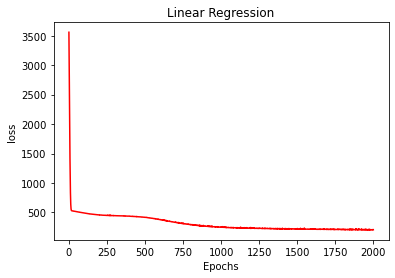

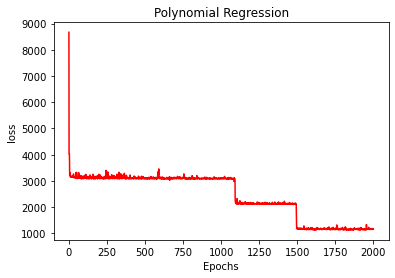

In [10]:
test.DisplayLoss()

### Displaying Predictions
Displaying the predictions from the Linear regression and polynomial regression models.

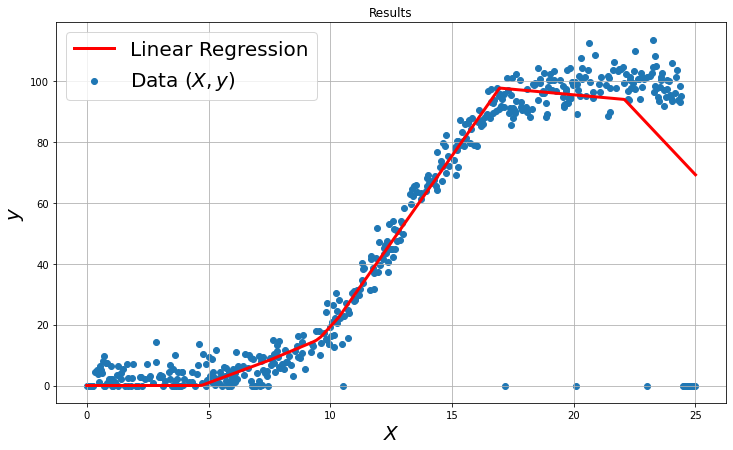

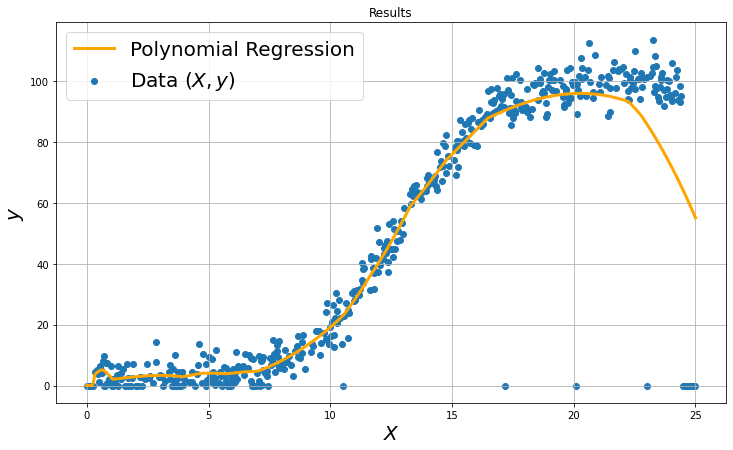

In [11]:
test.DisplayPredictions()